

*   NAME :TILU KURIAKOSE
*   STUDENT ID :KUR22605088

*   DRIVE LINK :https://colab.research.google.com/drive/1oKKiRPgl1-Yjs9nfP-6UBOtrI1GuJFPn?usp=sharing

*   DATA SET LINK :https://drive.google.com/drive/folders/1zbQ0OAo6FO0scdxFJcAAe1Zzw4K3iOCX?usp=drive_link







In [ ]:
!pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

## 1. loading the necessary libaries

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

In [ ]:
import numpy as np
import pandas as pd
import random as rd
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Setting seed for reproducibility
from numpy.random import seed
seed(25)
torch.manual_seed(50)

## 2. Dataset loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


data = []
paths = []
labels = []

# the images that have tumors
for r, d, f in os.walk('/content/drive/MyDrive/archive/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(1)

# the images with no tumors
paths = []
for r, d, f in os.walk('/content/drive/MyDrive/archive/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(0)

data = np.array(data)
data.shape

labels = np.array(labels)
labels = labels.reshape(len(labels), 1)

print('data shape is:', data.shape)
print('labels shape is:', labels.shape)


data shape is: (139, 128, 128, 3)
labels shape is: (139, 1)


# 3. Processing the images

In [ ]:
# 139 images with 128 height, 128 weight
print(data.shape)

(139, 128, 128, 3)


## 3.1 Changing pixel values

In [ ]:
# the max of the array
print(np.max(data))
# the min of the array
print(np.min(data))

255
0


In [ ]:
# Scaling the pixel values between 0 and 1
data = data / 255.0

# Getting the max and min of the scaled array
print("Max of the scaled data:", np.max(data))
print("Min of the scaled data:", np.min(data))


Max of the scaled data: 1.0
Min of the scaled data: 0.0


## 3.2 Visualizing the images

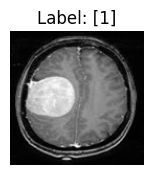

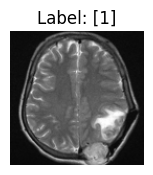

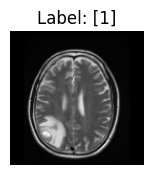

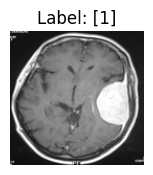

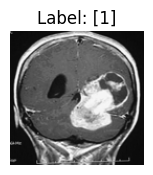

In [ ]:
import matplotlib.pyplot as plt

# Displaying the first 5 images
for i in range(5):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[i])
    plt.title("Label: {}".format(labels[i]))
    plt.axis("off")
plt.show()


In [ ]:
def plot_sample_images(paths, labels, n=40):
    import matplotlib.pyplot as plt
    from PIL import Image
    import numpy as np

    for label in [0, 1]:

        images = [np.array(Image.open(path).resize((128, 128))) for i, path in enumerate(paths) if labels[i] == label]
        n_images = images[:n]

        columns_n = 10
        rows_n = int(n / columns_n)

        plt.figure(figsize=(10, 8))

        i = 1
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image)


            plt.tick_params(axis='both', which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False, labelright=False)

            i += 1

        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()


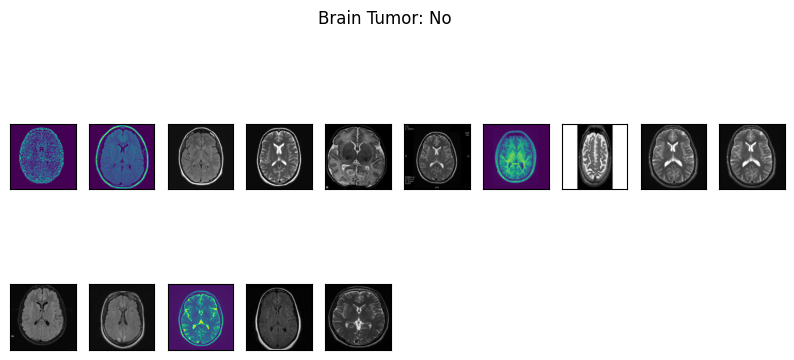

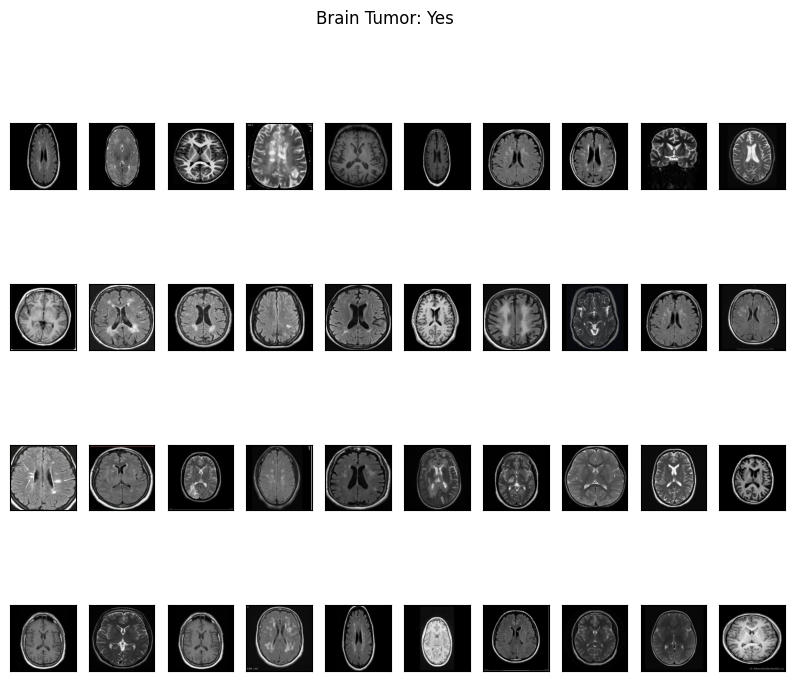

In [ ]:
plot_sample_images(paths, labels)

# 4 Model

## 4.1 Creating training and Fine tuning model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=7)

In [ ]:
print("Shape of training data:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test data:", x_test.shape)
print("Shape of test labels:", y_test.shape)

Shape of training data: (97, 128, 128, 3)
Shape of training labels: (97, 1)
Shape of test data: (42, 128, 128, 3)
Shape of test labels: (42, 1)


## 4.2 Creating baseline model

In [ ]:
class CNNmodel(nn.Module)
           # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Define max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Define fully connected layers
        self.fc1 = nn.Linear(64 * 28 * 28, 512)  # Input image size is 224x224
        self.fc2 = nn.Linear(512, 1)  # Output layer with single neuron for binary classification

        # Define activation function
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass through convolutional layers
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)

        # Flatten the output for fully connected layers
        x = x.view(-1, 64 * 28 * 28)  # Input image size is 224x224

        # Forward pass through fully connected layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)

        # Apply sigmoid activation for binary classification
        x = self.sigmoid(x)

        return x

# Create an instance of the CNNModel
model = CNNModel()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

In [ ]:
model.compile(
   optimizer = optim.Adam(model.parameters(), lr=0.001, eps=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = torch.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)


In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=200,
    callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/200
2/2 - 12s - loss: 0.6915 - accuracy: 0.5155 - val_loss: 0.7027 - val_accuracy: 0.4286 - 12s/epoch - 6s/step
Epoch 2/200
2/2 - 9s - loss: 0.6889 - accuracy: 0.5361 - val_loss: 0.7026 - val_accuracy: 0.4286 - 9s/epoch - 5s/step
Epoch 3/200
2/2 - 9s - loss: 0.6869 - accuracy: 0.5258 - val_loss: 0.7025 - val_accuracy: 0.4286 - 9s/epoch - 4s/step
Epoch 4/200
2/2 - 5s - loss: 0.6854 - accuracy: 0.5361 - val_loss: 0.7027 - val_accuracy: 0.4286 - 5s/epoch - 2s/step
Epoch 5/200
2/2 - 6s - loss: 0.6854 - accuracy: 0.5361 - val_loss: 0.7029 - val_accuracy: 0.4286 - 6s/epoch - 3s/step
Epoch 6/200
2/2 - 6s - loss: 0.6804 - accuracy: 0.5361 - val_loss: 0.7032 - val_accuracy: 0.4286 - 6s/epoch - 3s/step
Epoch 7/200
2/2 - 5s - loss: 0.6810 - accuracy: 0.5361 - val_loss: 0.7037 - val_accuracy: 0.4286 - 5s/epoch - 2s/step
Epoch 8/200
2/2 - 6s - loss: 0.6787 - accuracy: 0.5361 - val_loss: 0.7042 - val_accuracy: 0.4286 - 6s/epoch - 3s/step
Epoch 9/200
2/2 - 5s - loss: 0.6797 - accuracy: 0.5361

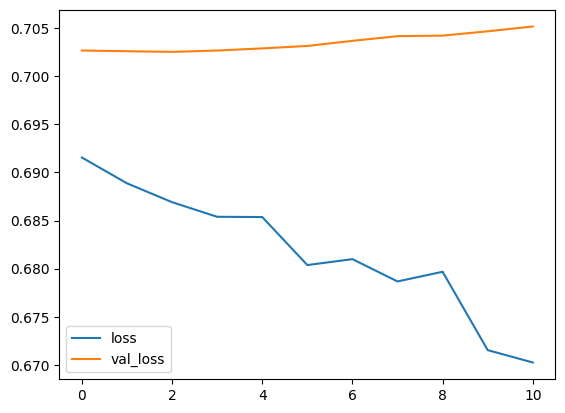

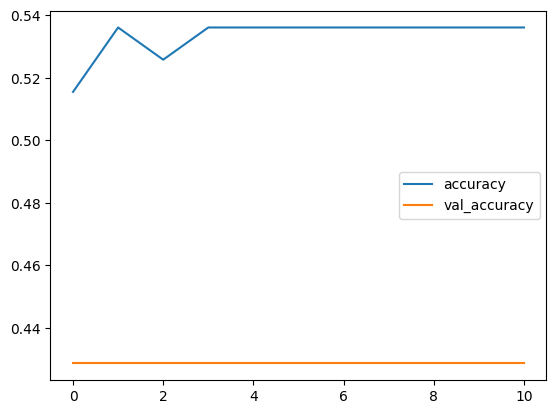

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [ ]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)

2/2 [==============================] - 1s 118ms/step


In [ ]:
# classification report
classification_report(y_test, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        24\n           1       0.43      1.00      0.60        18\n\n    accuracy                           0.43        42\n   macro avg       0.21      0.50      0.30        42\nweighted avg       0.18      0.43      0.26        42\n'

## 4.3 Adding data agumentation

In [ ]:
class CNNmodel(nn.Module)
           # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Define max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Define fully connected layers
        self.fc1 = nn.Linear(64 * 28 * 28, 512)  # Input image size is 224x224
        self.fc2 = nn.Linear(512, 1)  # Output layer with single neuron for binary classification

        # Define activation function
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass through convolutional layers
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)

        # Flatten the output for fully connected layers
        x = x.view(-1, 64 * 28 * 28)  # Input image size is 224x224

        # Forward pass through fully connected layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)

        # Apply sigmoid activation for binary classification
        x = self.sigmoid(x)

        return x

# Create an instance of the CNNModel
model = CNNModel()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

In [ ]:
model.compile(
   optimizer = optim.Adam(model.parameters(), lr=0.001, eps=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


early_stopping = torch.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=200,
    callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/200
2/2 - 9s - loss: 0.6917 - accuracy: 0.5155 - val_loss: 0.6942 - val_accuracy: 0.4286 - 9s/epoch - 4s/step
Epoch 2/200
2/2 - 6s - loss: 0.6920 - accuracy: 0.4742 - val_loss: 0.6943 - val_accuracy: 0.4286 - 6s/epoch - 3s/step
Epoch 3/200
2/2 - 7s - loss: 0.6906 - accuracy: 0.5773 - val_loss: 0.6943 - val_accuracy: 0.4286 - 7s/epoch - 3s/step
Epoch 4/200
2/2 - 5s - loss: 0.6901 - accuracy: 0.5155 - val_loss: 0.6945 - val_accuracy: 0.4286 - 5s/epoch - 2s/step
Epoch 5/200
2/2 - 7s - loss: 0.6898 - accuracy: 0.5567 - val_loss: 0.6947 - val_accuracy: 0.4286 - 7s/epoch - 3s/step
Epoch 6/200
2/2 - 5s - loss: 0.6856 - accuracy: 0.5361 - val_loss: 0.6949 - val_accuracy: 0.4286 - 5s/epoch - 3s/step
Epoch 7/200
2/2 - 5s - loss: 0.6840 - accuracy: 0.5361 - val_loss: 0.6953 - val_accuracy: 0.4286 - 5s/epoch - 3s/step
Epoch 8/200
2/2 - 7s - loss: 0.6845 - accuracy: 0.5361 - val_loss: 0.6956 - val_accuracy: 0.4286 - 7s/epoch - 3s/step
Epoch 9/200
2/2 - 7s - loss: 0.6831 - accuracy: 0.5361 -

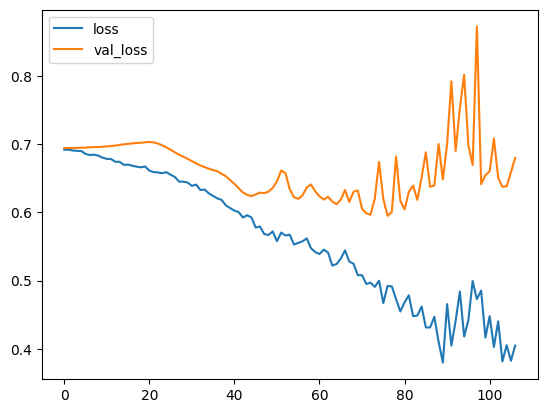

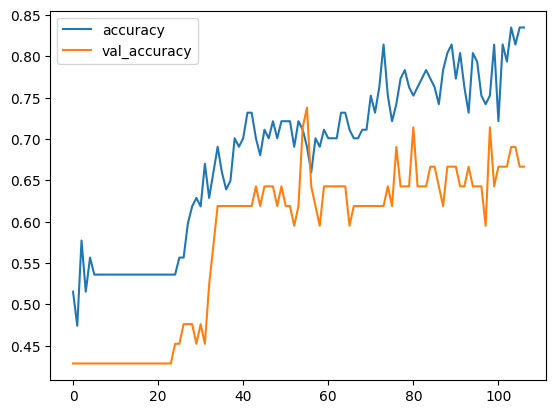

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [ ]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)

2/2 [==============================] - 1s 117ms/step


In [ ]:
# classification report
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.74      0.71      0.72        24\n           1       0.63      0.67      0.65        18\n\n    accuracy                           0.69        42\n   macro avg       0.69      0.69      0.69        42\nweighted avg       0.69      0.69      0.69        42\n'

## 4.4 Adding a New  Model

In [ ]:
# load base model
vgg16_weight_path = '../input/torch-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

from torch.applications.vgg16 import VGG16

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3)
)


58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
import os

model_path = os.path.join('/content', 'drive', 'model1.torch')
model.save(model_path)

In [ ]:
model.save('/content/drive/MyDrive/model1.torch')

# 5. Results



Model                      |     Accuracy
---------------------------|---------------
Baseline                   |     86%
Adding Data Agumentation   |     89%
Adding Pretrained Model    |     98%